# [ LG에너지솔루션_DX ] 변수선택 및 차원 축소 (2)

## 주성분분석 & t-SNE

### 강의 복습
강의자료 : 시계열 데이터 시각화

- 주성분분석 : 대표적인 선형 차원 감소 기법으로써 원래 데이터의 분산을 최대한 보존하는 새로운 기저(축, basis)를 찾고, 그 축에 데이터를 사영(projection)시키는 기법

- t-SNE : 가까운 이웃 객체들과의 거리 정보를 잘 보존하는 것이 멀리 떨어진 객체들과의 거리 정보를 보존하는 것보다 더 중요함을 가정으로 local pairwise distance를 확정적(deterministic)이 아닌 확률적(probabilistic)으로 정의함

<img src="./image/PCA01.png" width="800">

### 실습 요약
1. 본 실습에서는 주성분분석과 t-SNE를 통해 차원 축소를 진행합니다.
2. 분류 과업을 위해 로지스틱 모델을 통해 차원 축소 성능을 확인합니다.

---

In [ ]:
import numpy as np  # 다차원 배열과 연산을 다루는 모듈
import pandas as pd  # 데이터 조작 및 분석을 위한 모듈
import matplotlib.pyplot as plt  # 데이터 시각화를 위한 모듈
%matplotlib inline

import warnings  # 경고 메시지를 관리하기 위한 모듈
warnings.filterwarnings("ignore")  # 경고 메시지를 무시하도록 설정

### 주성분 분석 (PCA)

데이터의 분산(정보량)을 최대한 보존할 수 있는 기저 벡터를 찾는 것 (기저 벡터에 원래 벡터를 사영하여 새로운 좌표 생성)

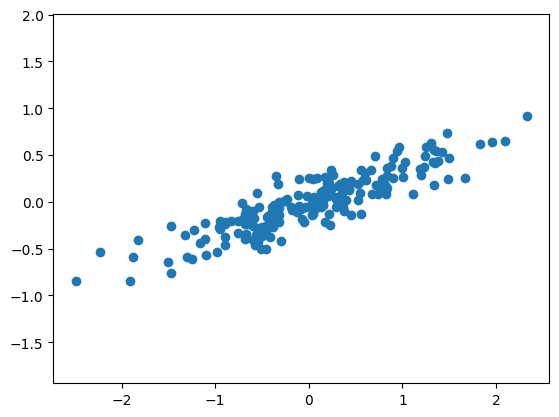

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

주성분분석을 통해 새로운 기저에 사영된 데이터의 분산이 어느정도인지 계산 가능함

<img src="./image/PCA02.png" width="500">

In [ ]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [ ]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


이 숫자들이 무엇을 의미하는지 알아보기 위해 입력 데이터 위에 벡터로 시각화하여 '구성 요소'를 사용하여 벡터의 방향을 정의하고 '설명 분산'을 사용하여 벡터의 제곱 길이를 정의

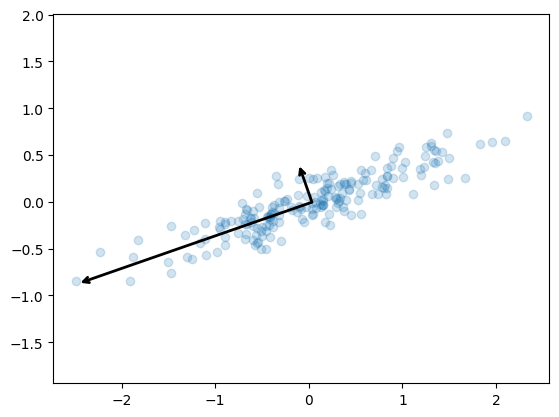

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

이러한 벡터는 데이터의 주축을 나타내며, 벡터의 길이는 데이터의 분포를 설명하는 데 있어 해당 축이 얼마나 '중요한지', 더 정확하게는 해당 축에 투영되었을 때 데이터의 분산을 나타내는 척도입니다. 각 데이터 포인트를 주축에 투영하는 것이 데이터의 '주성분'입니다.

#### 차원 축소

차원 축소를 위해 PCA를 사용하면 가장 작은 주성분 중 하나 이상을 제로화하여 최대 데이터 분산을 보존하는 저차원 데이터 투영을 할 수 있습니다.

In [ ]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


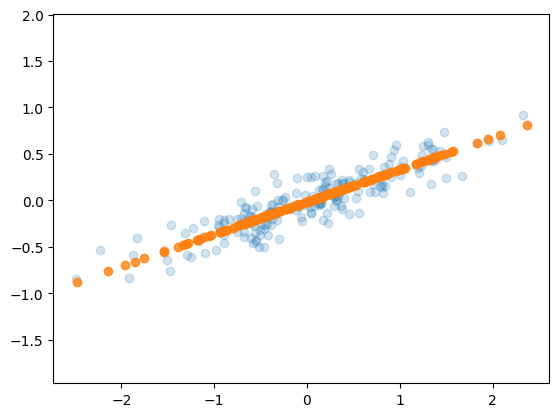

In [ ]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

중요하지 않은 주축의 정보는 제거되고 분산이 가장 큰 데이터의 구성 요소만 남게 됩니다. 잘려나간 분산의 비율(이 그림에서 형성된 선에 대한 점의 확산에 비례)은 이 차원 축소에서 얼마나 많은 '정보'가 버려지는지 대략적으로 측정할 수 있습니다.

### Manifold learning

주성분 분석은 유연하고 빠르며 쉽게 해석할 수 있지만, 데이터 내에 비선형 관계가 있는 경우에는 그다지 좋은 성능을 발휘하지 못합니다.

이러한 결함을 해결하기 위해, 데이터 집합을 고차원 공간에 포함된 저차원 다양체로 설명하는 비지도 추정기인 매니폴드 학습으로 알려진 방법 클래스를 사용할 수 있습니다.

In [ ]:
make_swiss_roll()

In [ ]:
from sklearn.datasets import make_swiss_roll
# X: 실제 데이터 / t: 각 포인트 별 상대적 위치를 나타내는 값 → 시각화 할 때 필요
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)


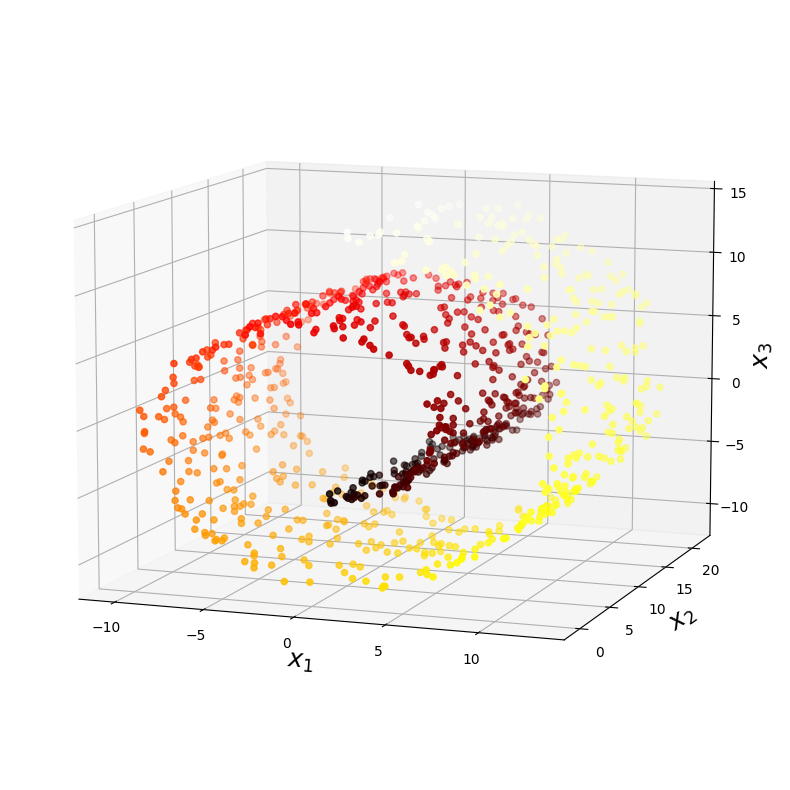

In [ ]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

스위스롤은 2D manifold의 한 예로 고차원 공간에서 휘어지거나 뒤틀린 2D 모양입니다.국부적으로 2D 평면으로 보이지만 3차원으로 말려 있습니다.

단순히 평면에 투영시키면 뭉개집니다.

왼쪽은 평면에 그냥 투영시켜서 뭉개진것, 오른쪽은 스위스 롤을 펼쳐 놓은 것

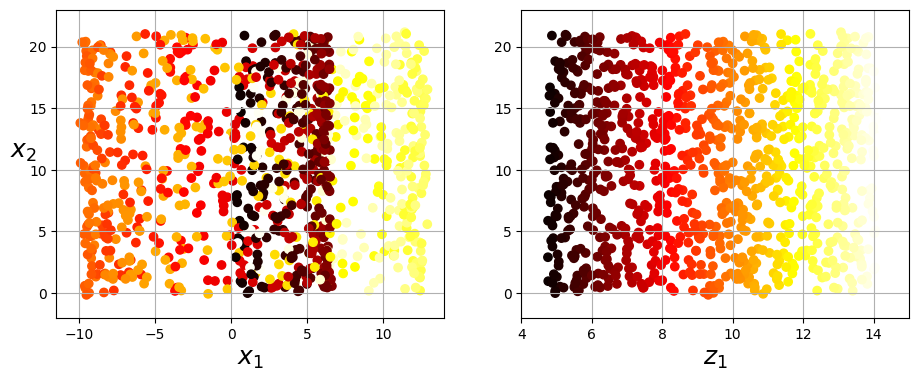

In [ ]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

#### PCA

In [ ]:
pca = PCA(n_components=2)
X_reduced_pca = pca.fit_transform(X)

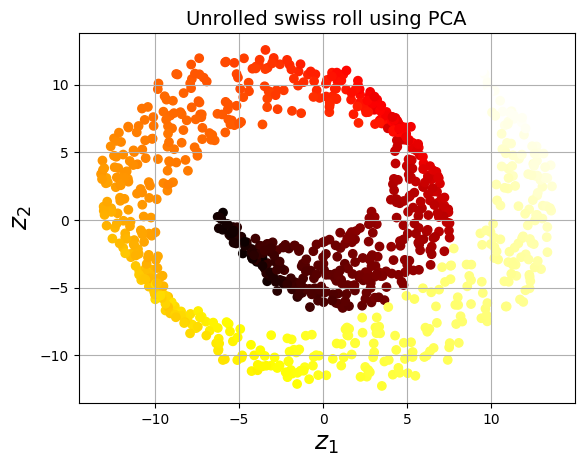

In [ ]:
plt.title("Unrolled swiss roll using PCA", fontsize=14)
plt.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.grid(True)

plt.show()

#### t-SNE
- 가까운 이웃 객체들과의 거리 정보를 잘 보존하는 것이 멀리 떨어진 객체들과의 거리 정보를 보존하는 것보다 더 중요함
- SNE는 local pairwise distance를 확정적(deterministic)이 아닌 확률적(probabilistic)으로 정의함
- 원래 차원과 임베딩(embedding)된 이후의 저차원에서 두 객체간의 이웃 관계는 잘 보존이 되어야 함
- 정규 분포를 사용하는 SNE와 달리 t-SNE는 t 분포를 사용하면 좀 더 멀리있는 객체에 대한 정보까지도 잘 반영함

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

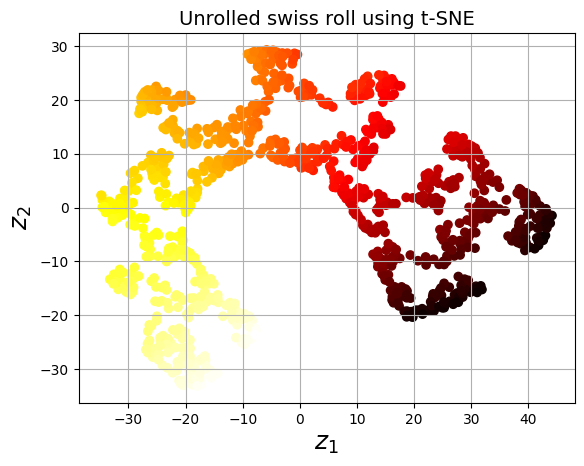

In [ ]:
plt.title("Unrolled swiss roll using t-SNE", fontsize=14)
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.grid(True)

plt.show()

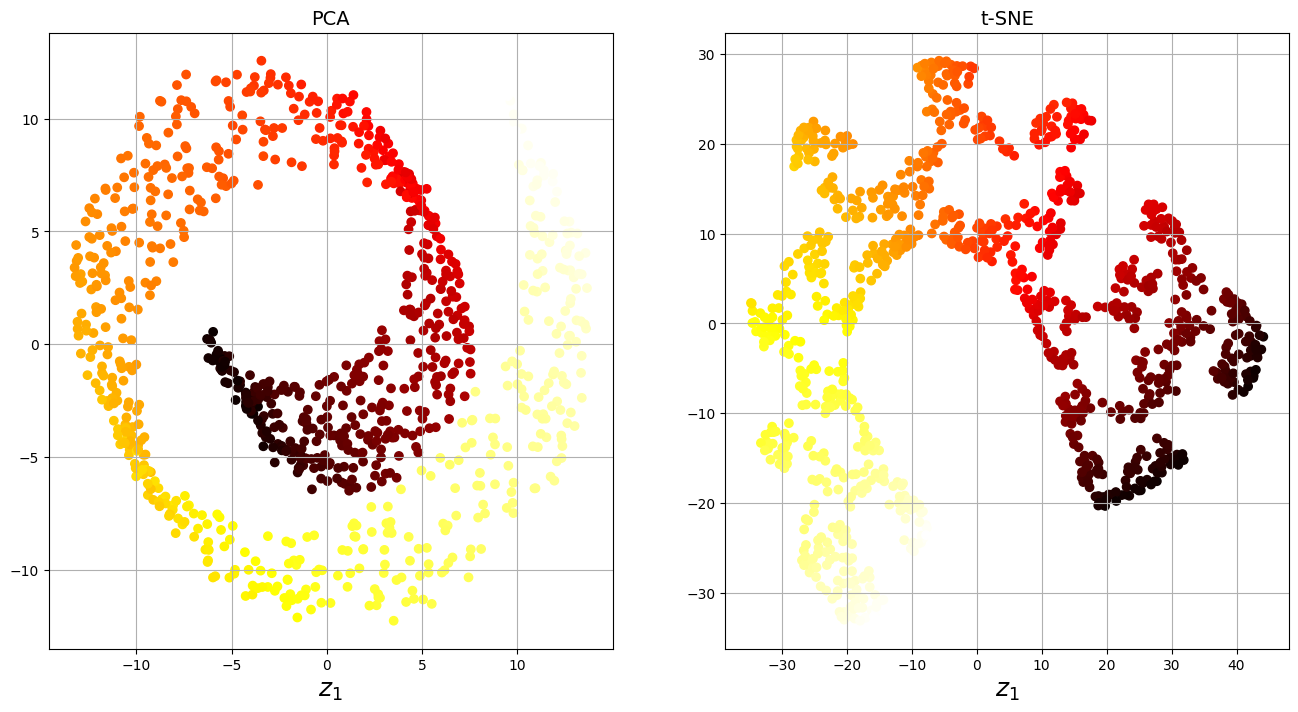

In [ ]:
titles = ["PCA", "t-SNE"]

plt.figure(figsize=(16,8))

for subplot, title, X_reduced in zip((121,122), titles,
                                     (X_reduced_pca, X_reduced_tsne)):
    plt.subplot(subplot) # ex) 121 = 1행 x 2열 개의 부분 그림 중 1번 위치에 그림
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 151:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

---

## Personal Loan 이용하여 차원 축소 후 예측 성능 확인

- 입력변수: 11개 / 출력변수: 개인 대출 여부(개인 대출 받음 =1 , 그 외 = 0)
- 변수선택 및 차원 축소 (1) 에서와 같이 동일한 전처리 진행

### 데이터 불러오기

In [ ]:
import pandas as pd  # 데이터 조작 및 분석을 위한 모듈
ploan = pd.read_csv("Personal Loan.csv")
display(ploan)

# 활용할 입력변수 골라내기
ploan_data = ploan.drop(['ID','ZIP Code'],axis='columns')
display(ploan_data)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,46,22,70,94701,4,1.9,1,212,0,0,0,0,1
2496,2497,63,37,32,93117,3,0.7,2,141,0,0,0,0,0
2497,2498,33,9,14,95133,3,0.9,3,114,0,0,0,0,0
2498,2499,38,14,111,92028,2,6.1,1,326,0,0,0,0,0


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,46,22,70,4,1.9,1,212,0,0,0,0,1
2496,63,37,32,3,0.7,2,141,0,0,0,0,0
2497,33,9,14,3,0.9,3,114,0,0,0,0,0
2498,38,14,111,2,6.1,1,326,0,0,0,0,0


### 데이터셋 분리
* 첫 1,500개 샘플을 학습용, 나머지 샘플을 검증용으로 구분

In [ ]:
ploan_trn = ploan_data.iloc[:1500,:]
ploan_tst = ploan_data.iloc[1500:,:]

x_trn, y_trn = ploan_trn.drop(['Personal Loan'],axis='columns'), ploan_trn['Personal Loan']
x_tst, y_tst = ploan_tst.drop(['Personal Loan'],axis='columns'), ploan_tst['Personal Loan']

# feature names
feature_names = list(x_trn.columns)

### 평가 지표 값 산출하기 및 결과 표 작성

In [ ]:
from typing import Union
import numpy as np
from sklearn.metrics import confusion_matrix


def perf_eval_clf(y_true: Union[np.ndarray,list], y_pred: Union[np.ndarray,list])->list:
    """
    Input:
    y_true : ndarray of shape (n_samples,)
    y_pred : ndarray of shape (n_samples,)

    Return:
    [TPR,Precision,TNR, Accuracy, BCR, F1]: scores of classification in a list
    """
    cm = confusion_matrix(y_true = y_true, y_pred = y_pred)

    print(f"Confusion Matrix:\n{cm.T}")
    tp, fp, fn, tn = np.flip(cm).ravel()

    TPR = round(tp/(tp+fn),3)
    PRE = round(tp/(tp+fp),3)
    TNR = round(tn/(fp+tn),3)
    ACC = round((tp+tn)/(tn+fp+fn+tp),3)
    BCR = round(np.sqrt([TPR*TNR])[0],3)
    F1 = round(2*TPR*PRE/(TPR+PRE),3)


    return [TPR,PRE,TNR,ACC,BCR,F1]

In [ ]:
import pandas as pd

def display_result(result_dict: dict, metric_names: list = ['TPR(Recall)','Precision','TNR','ACC','BCR','F1']):
    """
    Input:
    result_dict : 데이터 셋 별 classification 평가 결과 저장한 dictionary
    ex) {'Personal Loan':[0.1,0.5,0.3],...}


    metric_names : Classification 평가 지표 이름 List
    ex) ['TPR(Recall)','Precision','TNR','ACC','BCR','F1']
    """
    result_df = pd.DataFrame(result_dict).T
    result_df.index = list(result_dict.keys())
    result_df.columns = metric_names

    display(result_df)

result_dict= {}

### 학습 데이터 산포 비교
- 기법들을 활용하여 2차원, 3차원 상에서의 class별 산포를 확인함

(1)  2차원 산포 비교

In [ ]:
ploan_pca = PCA(n_components=2).fit_transform(x_trn)
ploan_tsne = TSNE(n_components = 2, random_state=42).fit_transform(x_trn)

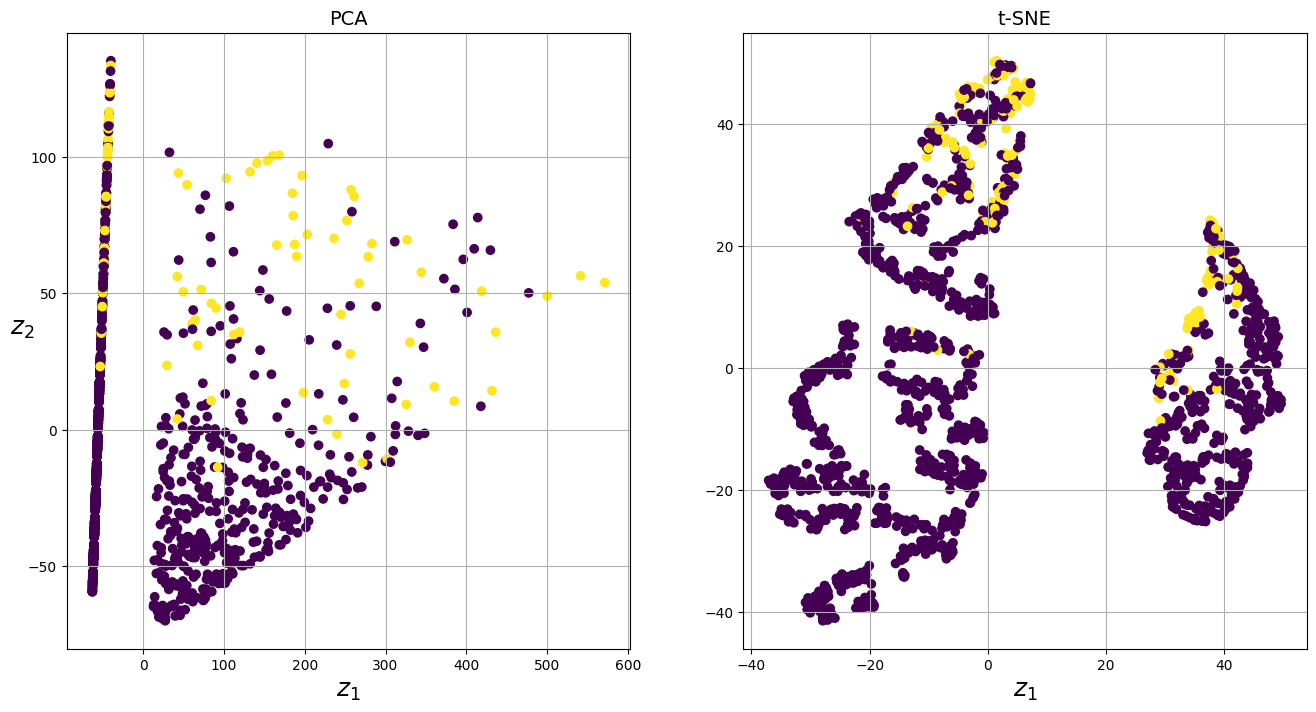

In [ ]:
titles = ["PCA", "t-SNE"]

plt.figure(figsize=(16,8))

for subplot, title, reduced in zip((121, 122), titles,
                                     (ploan_pca,ploan_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(reduced[:, 0], reduced[:, 1], c=y_trn)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 121:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

(2) 3차원 산포 비교

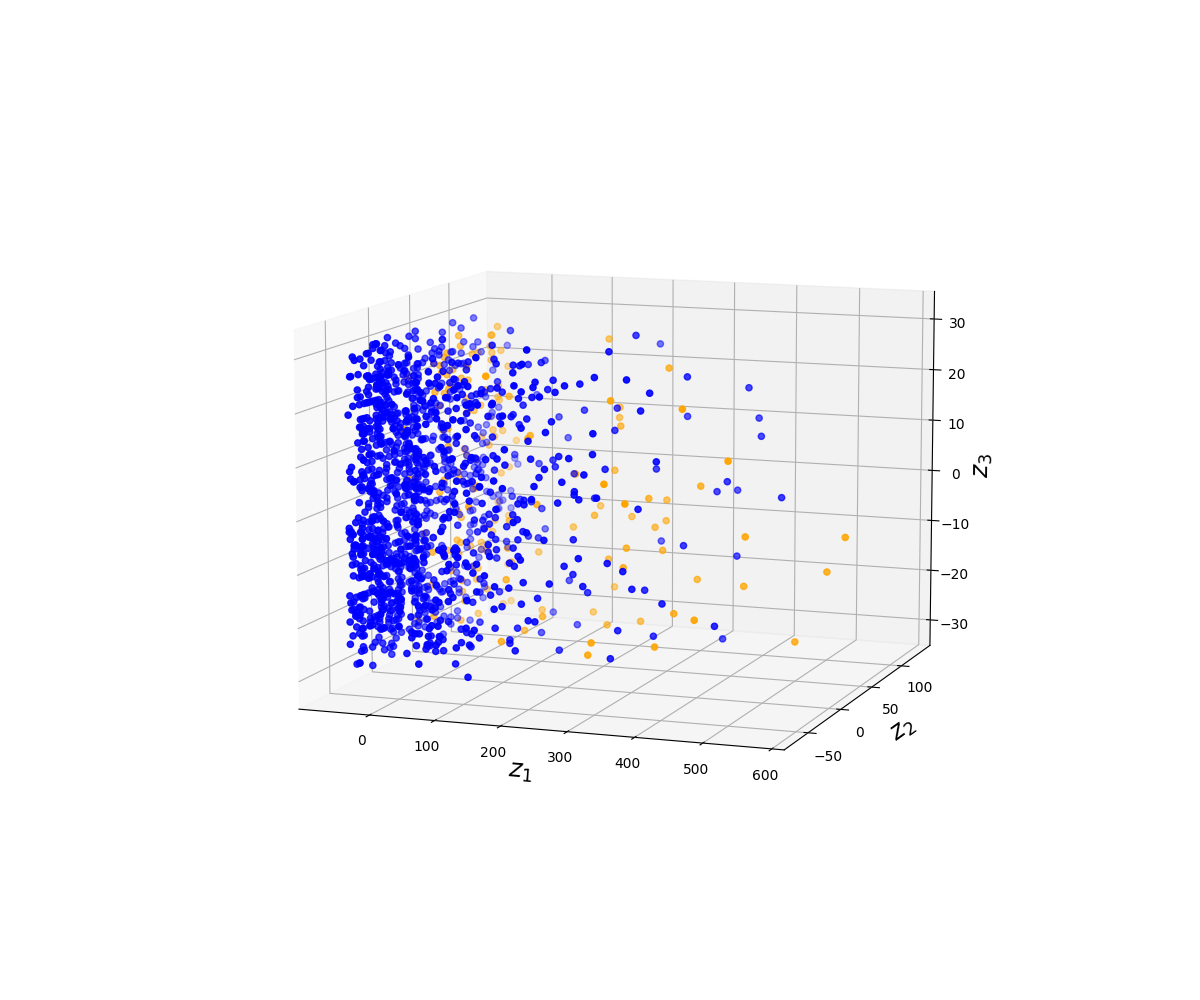

In [ ]:
pca_3d = PCA(n_components=3).fit_transform(x_trn)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3d[y_trn==0, 0],
            pca_3d[y_trn==0, 1],
            pca_3d[y_trn==0, 2],
            c='blue', label='0')

ax.scatter(pca_3d[y_trn==1, 0],
            pca_3d[y_trn==1, 1],
            pca_3d[y_trn==1, 2],
            c='orange', label='1')

ax.view_init(10, -70)
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18)
ax.set_zlabel("$z_3$", fontsize=18)


plt.show()

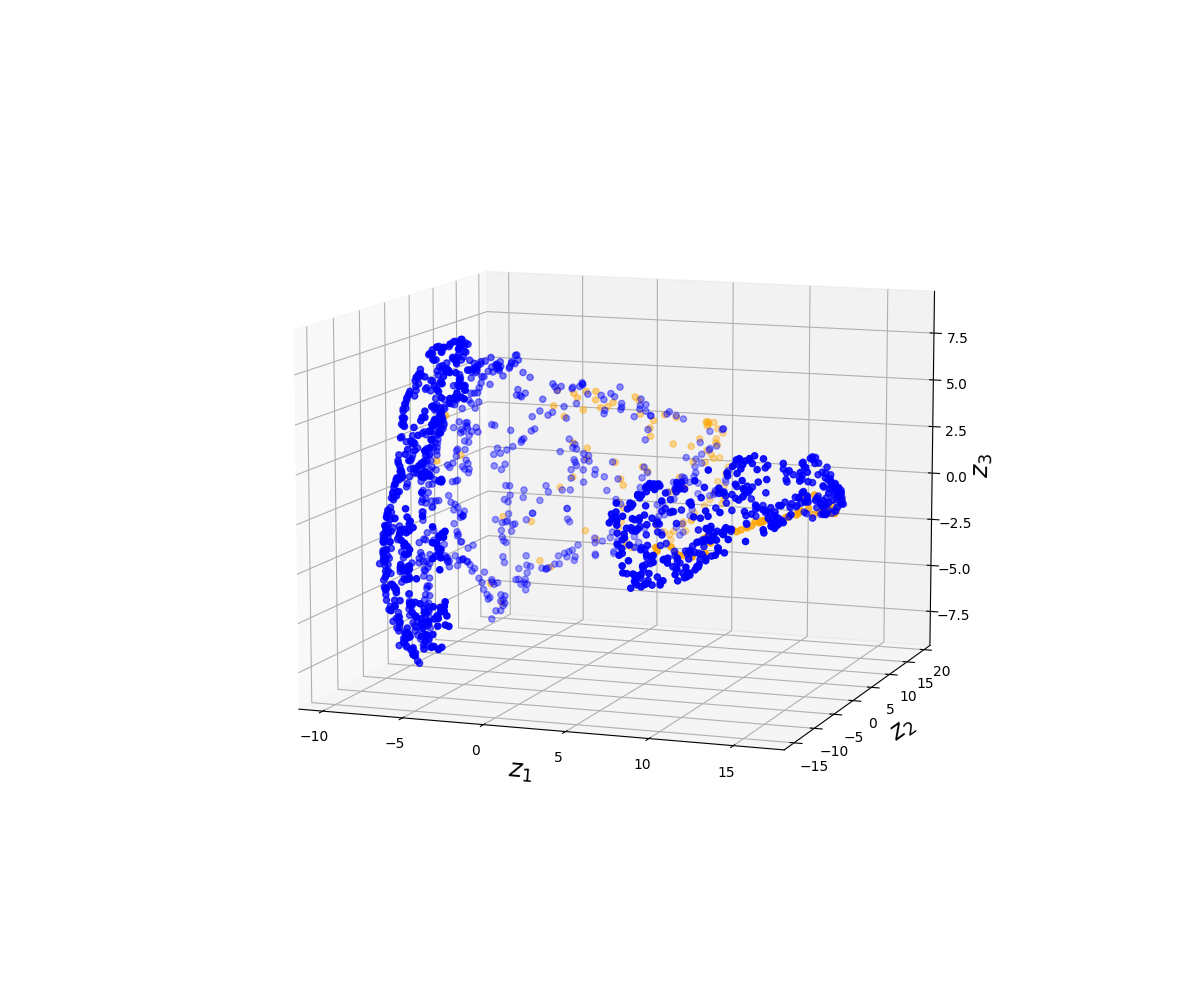

In [ ]:
tsne_3d = TSNE(n_components = 3, random_state=42).fit_transform(x_trn)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_3d[y_trn==0, 0],
            tsne_3d[y_trn==0, 1],
            tsne_3d[y_trn==0, 2],
            c='blue', label='0')

ax.scatter(tsne_3d[y_trn==1, 0],
            tsne_3d[y_trn==1, 1],
            tsne_3d[y_trn==1, 2],
            c='orange', label='1')

ax.view_init(10, -70)
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18)
ax.set_zlabel("$z_3$", fontsize=18)


plt.show()

### 변수축소 후 성능 비교
- PCA를 활용하여 변수 추출(차원 축소)을 진행한 후 분류 모델을 학습함
- 기존 분류 모델과의 성능 비교를 통해 PCA의 효과를 확인함

1) 모든 변수 활용

In [ ]:
from sklearn.linear_model import LogisticRegression
seed = 1234
full_config = {
    'penalty':None,
    'fit_intercept':True,
    'max_iter':1000,
    'solver':'saga',
    'random_state':seed,
    'n_jobs':-1

}

full_model = LogisticRegression(**full_config).fit(x_trn,y_trn)

y_pred = full_model.predict(x_tst)
result_dict['All Variables'] = perf_eval_clf(y_tst,y_pred)
display_result(result_dict)


Confusion Matrix:
[[867  51]
 [ 29  53]]


,TPR(Recall),Precision,TNR,ACC,BCR,F1
All Variables,0.646,0.510,0.944,0.920,0.781,0.570
PCA,0.295,0.962,0.994,0.757,0.542,0.452
tSNE,0.581,0.346,0.928,0.906,0.734,0.434


2) PCA

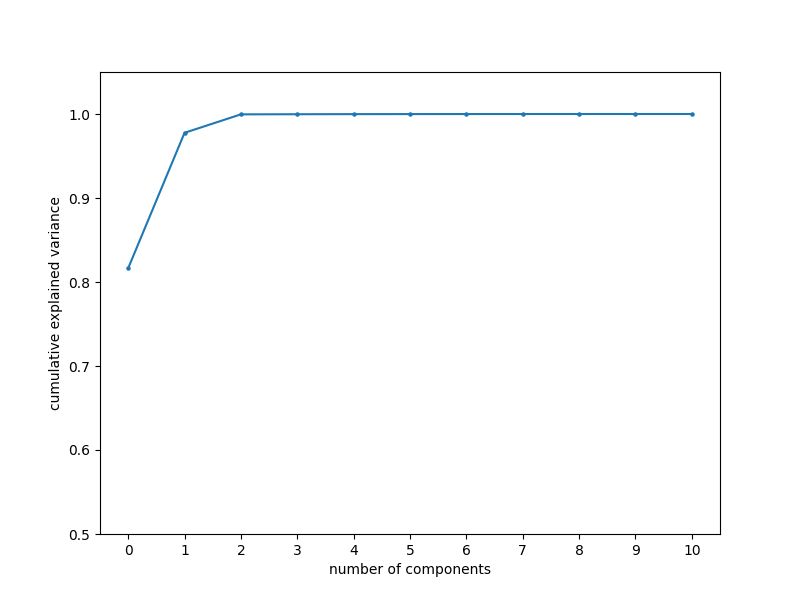

In [ ]:
pca = PCA().fit(x_trn)
ratio = pca.explained_variance_ratio_
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.plot(np.cumsum(ratio),)
plt.scatter(np.arange(len(ratio)),np.cumsum(ratio),s=5)
plt.xticks(np.arange(len(ratio)))
plt.ylim(0.5,1.05)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
pca = PCA(n_components=3).fit(x_trn)
x_trn_pca = pca.transform(x_trn)
x_tst_pca = pca.transform(x_tst)

seed = 1234
full_config = {
    'penalty':None,
    'fit_intercept':True,
    'max_iter':1000,
    'solver':'saga',
    'random_state':seed,
    'n_jobs':-1

}

pca_model = LogisticRegression(**full_config).fit(x_trn_pca,y_trn)

y_pred = pca_model.predict(x_tst_pca)
result_dict['PCA'] = perf_eval_clf(y_tst,y_pred)
display_result(result_dict)


Confusion Matrix:
[[657   4]
 [239 100]]


,TPR(Recall),Precision,TNR,ACC,BCR,F1
All Variables,0.646,0.510,0.944,0.920,0.781,0.570
PCA,0.295,0.962,0.994,0.757,0.542,0.452
tSNE,0.581,0.346,0.928,0.906,0.734,0.434


3) tSNE

In [ ]:
x_data = ploan.drop(['ID','ZIP Code','Personal Loan'],axis='columns')
x_data_tsne = TSNE(n_components=3, random_state=42).fit_transform(x_data)
x_trn_tsne = x_data_tsne[:1500,:]
x_tst_tsne = x_data_tsne[1500:,:]

seed = 1234
full_config = {
    'penalty':None,
    'fit_intercept':True,
    'max_iter':1000,
    'solver':'saga',
    'random_state':seed,
    'n_jobs':-1

}

tsne_model = LogisticRegression(**full_config).fit(x_trn_tsne,y_trn)

y_pred = tsne_model.predict(x_tst_tsne)
result_dict['tSNE'] = perf_eval_clf(y_tst,y_pred)
display_result(result_dict)


Confusion Matrix:
[[870  68]
 [ 26  36]]


,TPR(Recall),Precision,TNR,ACC,BCR,F1
All Variables,0.646,0.510,0.944,0.920,0.781,0.570
PCA,0.295,0.962,0.994,0.757,0.542,0.452
tSNE,0.581,0.346,0.928,0.906,0.734,0.434


---

# EOD